<h1>Steps to solve any ML Problem</h1>


 0. Preprocess + EDA + Feature Selection
 1. Extract input and output cols
 2. Scale the values
 3. Train test split
 4. Train the model
 5. Evaluate the model/model selection
 6. Deploy the model
     

<h2>First import the basic libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>Now import data and explore it</h2>

In [2]:
df = pd.read_csv("placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


<h4>We observe a waste column to remove</h4>

In [5]:
df = df.iloc[: , 1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


<h4>Let's check for null data values and process them if any</h4>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


<h4>Now plot a graph to visualize data</h4>

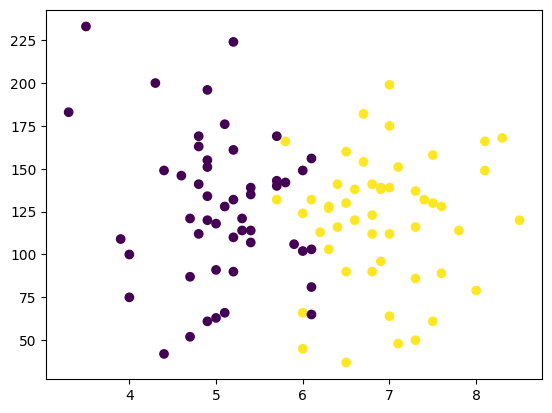

In [19]:
plt.scatter(df["cgpa"],df["iq"] , c= df["placement"])

<h4>The graph above shows quite a uniform distribution so we will use logisitic regression to classify</h4>

<h4>Now create dependent and indpendent variable parameters</h4>

In [9]:
x = df.iloc[: , 0:2]
y = df.iloc[: , -1]

In [10]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [11]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

<h4>Import and implement train-test split library </h4>

In [12]:
from sklearn.model_selection import train_test_split

In [31]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.1)

In [32]:
x_train

,cgpa,iq
85,5.8,166.0
63,6.3,128.0
11,6.9,138.0
81,5.4,107.0
86,5.1,128.0
...,...,...
62,6.0,102.0
51,4.8,141.0
69,8.5,120.0
7,5.0,63.0


In [33]:
x_test

,cgpa,iq
8,6.1,156.0
90,7.3,86.0
36,5.7,140.0
31,3.9,109.0
61,7.3,137.0
97,6.7,182.0
5,7.1,48.0
24,4.7,121.0
87,5.7,132.0
41,5.4,114.0


In [34]:
y_train

85    1
63    1
11    1
81    0
86    0
     ..
62    0
51    0
69    1
7     0
75    0
Name: placement, Length: 90, dtype: int64

In [35]:
y_test

8     0
90    1
36    0
31    0
61    1
97    1
5     1
24    0
87    1
41    0
Name: placement, dtype: int64

<h4>Since the ranges of x vary a lot , we will do scaling</h4>

<h4>Import and implement library from sklearn</h4>

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.16707882,  1.05190147],
       [ 0.270046  ,  0.10693088],
       [ 0.7945958 ,  0.35560735],
       [-0.51677868, -0.41528971],
       [-0.77905358,  0.10693088],
       [-0.69162862,  0.20640147],
       [-0.69162862, -0.34068676],
       [-0.95390351,  1.79793088],
       [-0.86647855, -0.14174559],
       [-0.16707882,  0.45507794],
       [ 0.70717083,  0.43021029],
       [ 1.40657056, -0.86290735],
       [ 1.84369538,  0.62915147],
       [-0.25450379,  0.47994559],
       [ 1.75627042, -1.11158382],
       [-0.69162862,  0.92756323],
       [-1.4784533 ,  1.89740147],
       [ 0.35747097,  0.43021029],
       [-1.39102834, -2.03168676],
       [-0.86647855, -0.81317206],
       [-1.12875344, -0.91264265],
       [-1.12875344, -1.78301029],
       [-1.39102834,  0.62915147],
       [ 0.44489594,  0.90269559],
       [ 0.7945958 ,  0.380475  ],
       [ 0.09519607, -1.06184853],
       [ 0.09519607, -1.45973088],
       [ 0.44489594, -0.83803971],
       [ 1.31914559,

In [40]:
x_test = scaler.transform(x_test)

In [41]:
x_test

array([[ 0.09519607,  0.803225  ],
       [ 1.14429566, -0.93751029],
       [-0.25450379,  0.40534265],
       [-1.82815317, -0.36555441],
       [ 1.14429566,  0.33073971],
       [ 0.61974587,  1.44978382],
       [ 0.96944573, -1.88248088],
       [-1.12875344, -0.06714265],
       [-0.25450379,  0.20640147],
       [-0.51677868, -0.24121618]])

<h4>Now import and implement logistic regression from sklearn library</h4>

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
clf = LogisticRegression()

In [44]:
clf.fit(x_train,y_train)

LogisticRegression()

In [45]:
clf.predict(x_test)

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

<h4>calculate accuracy using sklearn library</h4>

In [46]:
y_pred = clf.predict(x_test)

In [47]:
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,y_pred)

0.8

<h4>Use mlxtend library to visualize logistic regression line</h4>

In [51]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot: >

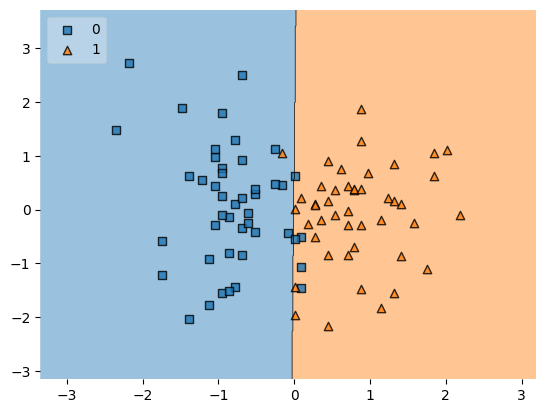

In [52]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

<h4>using pickle library to save the model</h4>

In [53]:
import pickle

In [54]:
pickle.dump(clf , open("placem_model.pk1" , "wb"))